In [2]:
import ROOT

ModuleNotFoundError: No module named 'ROOT'

In [34]:
%matplotlib inline
import uproot
import hist
import matplotlib.pyplot as plt
import mplhep as hep
from pathlib import Path

In [35]:
hep.set_style(hep.styles.CMS)

In [3]:
%load_ext watermark
%watermark
%watermark --iversions

In [36]:
output_dir = Path('./plots/')

In [37]:
root_file = uproot.open('TestGEMCSCSegmentHistograms.root')

In [38]:
root_file.keys()

['SimTrack_etaVScharge;1',
 'SimTrack_etaVStype;1',
 'ReducedChi2_csc;1',
 'ReducedChi2_gemcsc;1',
 'ReducedChi2_odd_gemcsc;1',
 'ReducedChi2_even_gemcsc;1',
 'NumGEMRH;1',
 'NumCSCRH;1',
 'NumGEMCSCRH;1',
 'NumGMCSCSeg;1',
 'SuperS_LPx;1',
 'SuperS_LPy;1',
 'SuperS_LPEx;1',
 'SuperS_LPEy;1',
 'SuperS_LDx;1',
 'SuperS_LDy;1',
 'SuperS_LDEx;1',
 'SuperS_LDEy;1',
 'CSCSegm_LPx;1',
 'CSCSegm_LPy;1',
 'CSCSegm_LPEx;1',
 'CSCSegm_LPEy;1',
 'CSCSegm_LDx;1',
 'CSCSegm_LDy;1',
 'CSCSegm_LDEx;1',
 'CSCSegm_LDEy;1',
 'SSegm_LDEy_vs_ndof;1',
 'SSegm_LPEy_vs_ndof;1',
 'CSCSegm_LDEy_vs_ndof;1',
 'CSCSegm_LPEy_vs_ndof;1',
 'SSegm_LDx_expected;1',
 'SSegm_LDy_expected;1',
 'SuperS_LDEx_expected;1',
 'SuperS_LDEy_expected;1',
 'xGEMCSCRes;1',
 'xGEMRes;1',
 'xCSCRes;1',
 'xGEMRes_even;1',
 'xCSCRes_even;1',
 'xGEMRes_odd;1',
 'xCSCRes_odd;1',
 'xGEMCSCRes_cscl1;1',
 'xGEMCSCRes_cscl2;1',
 'xGEMCSCRes_cscl3;1',
 'xGEMCSCRes_cscl4;1',
 'xGEMCSCRes_cscl5;1',
 'xGEMCSCRes_cscl6;1',
 'xGEMCSCRes_geml1;1',


In [39]:
def plot(key, ax=None, label=None):
    h = root_file[key].to_hist()
    if ax is None:
        fig, ax = plt.subplots()
    else:
        fig = None
    h.plot(ax=ax, label=label)
    ax.set_title('2021 (14 TeV)', loc='right')
    ax.legend(title='1k ZMM')
    if ax is not None:
        return fig, ax

No handles with labels found to put in legend.
'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


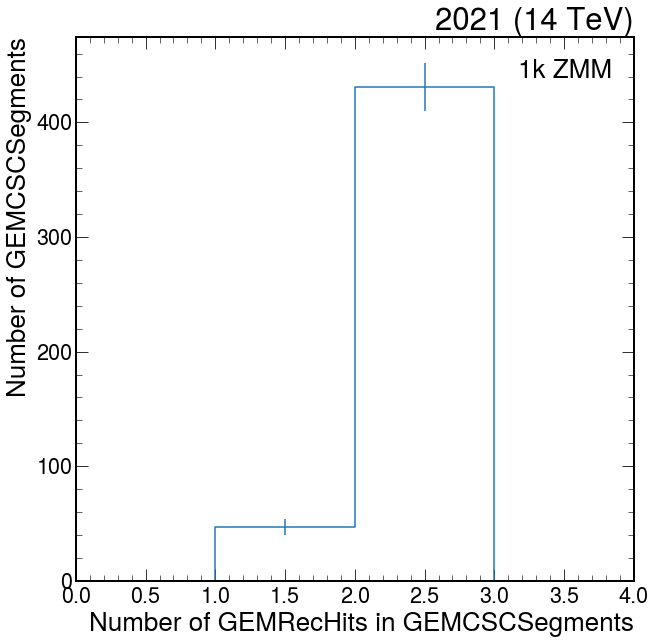

In [40]:
key = 'NumGEMRH'
fig, ax = plot(key)
ax.set_xlim(0, 4)
ax.set_xlabel('Number of GEMRecHits in GEMCSCSegments')
ax.set_ylabel('Number of GEMCSCSegments')
fig.savefig(output_dir.joinpath(key).with_suffix('.png'))
fig.savefig(output_dir.joinpath(key).with_suffix('.pdf'))

No handles with labels found to put in legend.
'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


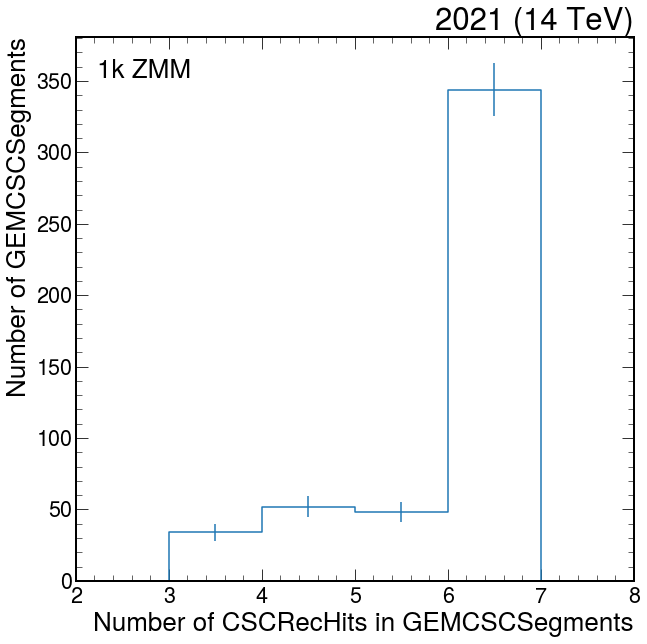

In [41]:
key = 'NumCSCRH'
fig, ax = plot(key)
ax.set_xlim(2, 8)
ax.set_xlabel('Number of CSCRecHits in GEMCSCSegments')
ax.set_ylabel('Number of GEMCSCSegments')
fig.savefig(output_dir.joinpath(key).with_suffix('.png'))
fig.savefig(output_dir.joinpath(key).with_suffix('.pdf'))

No handles with labels found to put in legend.
'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


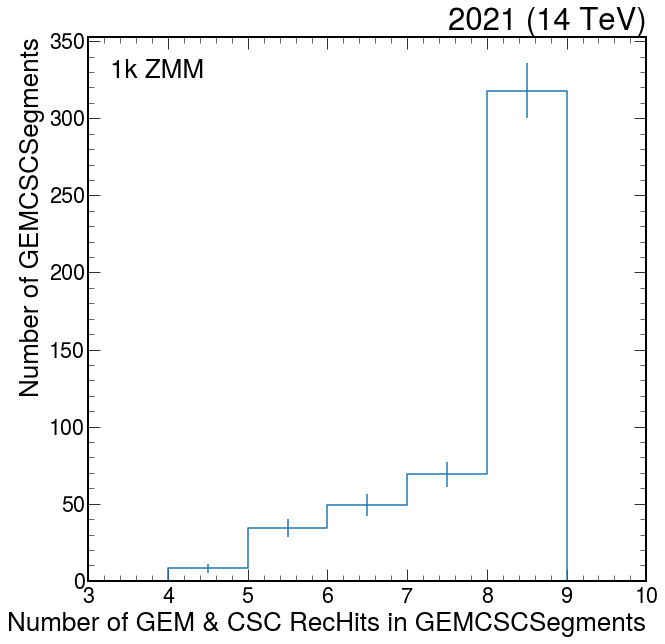

In [42]:
key = 'NumGEMCSCRH'
fig, ax = plot(key)
ax.set_xlim(3, 10)
ax.set_xlabel('Number of GEM & CSC RecHits in GEMCSCSegments')
ax.set_ylabel('Number of GEMCSCSegments')
fig.savefig(output_dir.joinpath(key).with_suffix('.png'))
fig.savefig(output_dir.joinpath(key).with_suffix('.pdf'))

No handles with labels found to put in legend.
'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


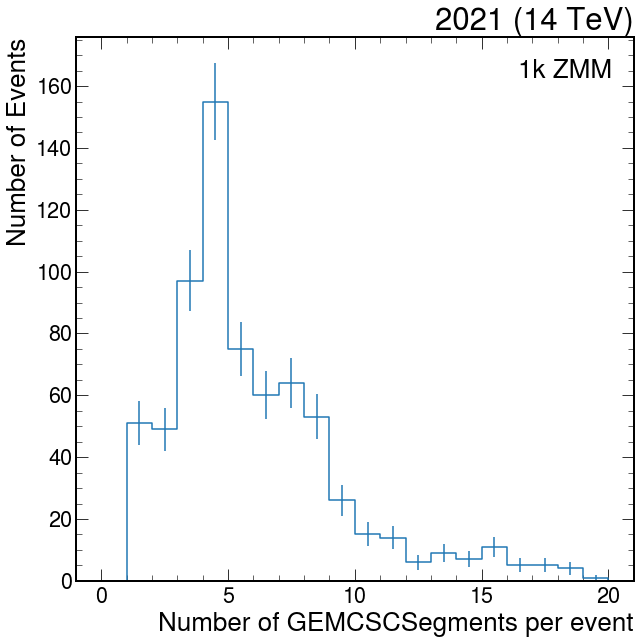

In [43]:
key = 'NumGMCSCSeg'
fig, ax = plot(key)
ax.set_xlabel('Number of GEMCSCSegments per event')
ax.set_ylabel('Number of Events')
fig.savefig(output_dir.joinpath(key).with_suffix('.png'))
fig.savefig(output_dir.joinpath(key).with_suffix('.pdf'))

In [44]:
h = root_file['NumGMCSCSeg'].to_hist()

In [45]:
h.to_numpy()[0].sum()

707.0

(None, <AxesSubplot:title={'right':'2021 (14 TeV)'}>)

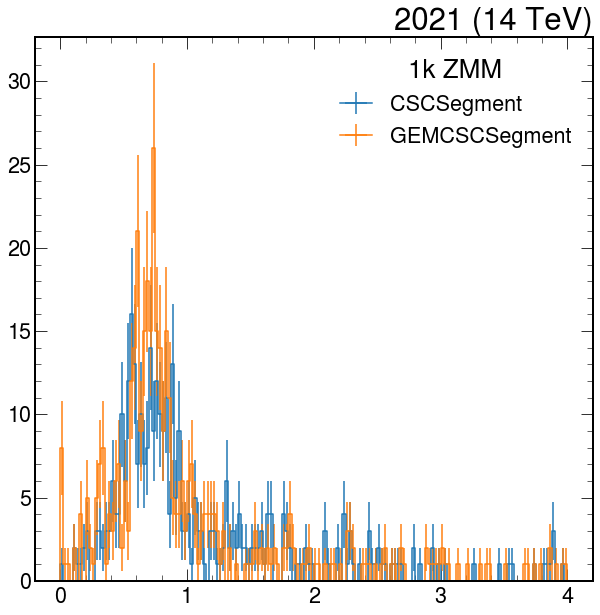

In [46]:
fig, ax = plot('ReducedChi2_gemcsc', label='CSCSegment')
plot('ReducedChi2_csc', ax=ax, label='GEMCSCSegment')